In [268]:
import glob
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 15})

In [86]:

pip_path = '../data/PIP/2019_MQT/netCDF/'
mrr_path = '../data/MRR/'
met_path = '../data/MET/'


/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data ==

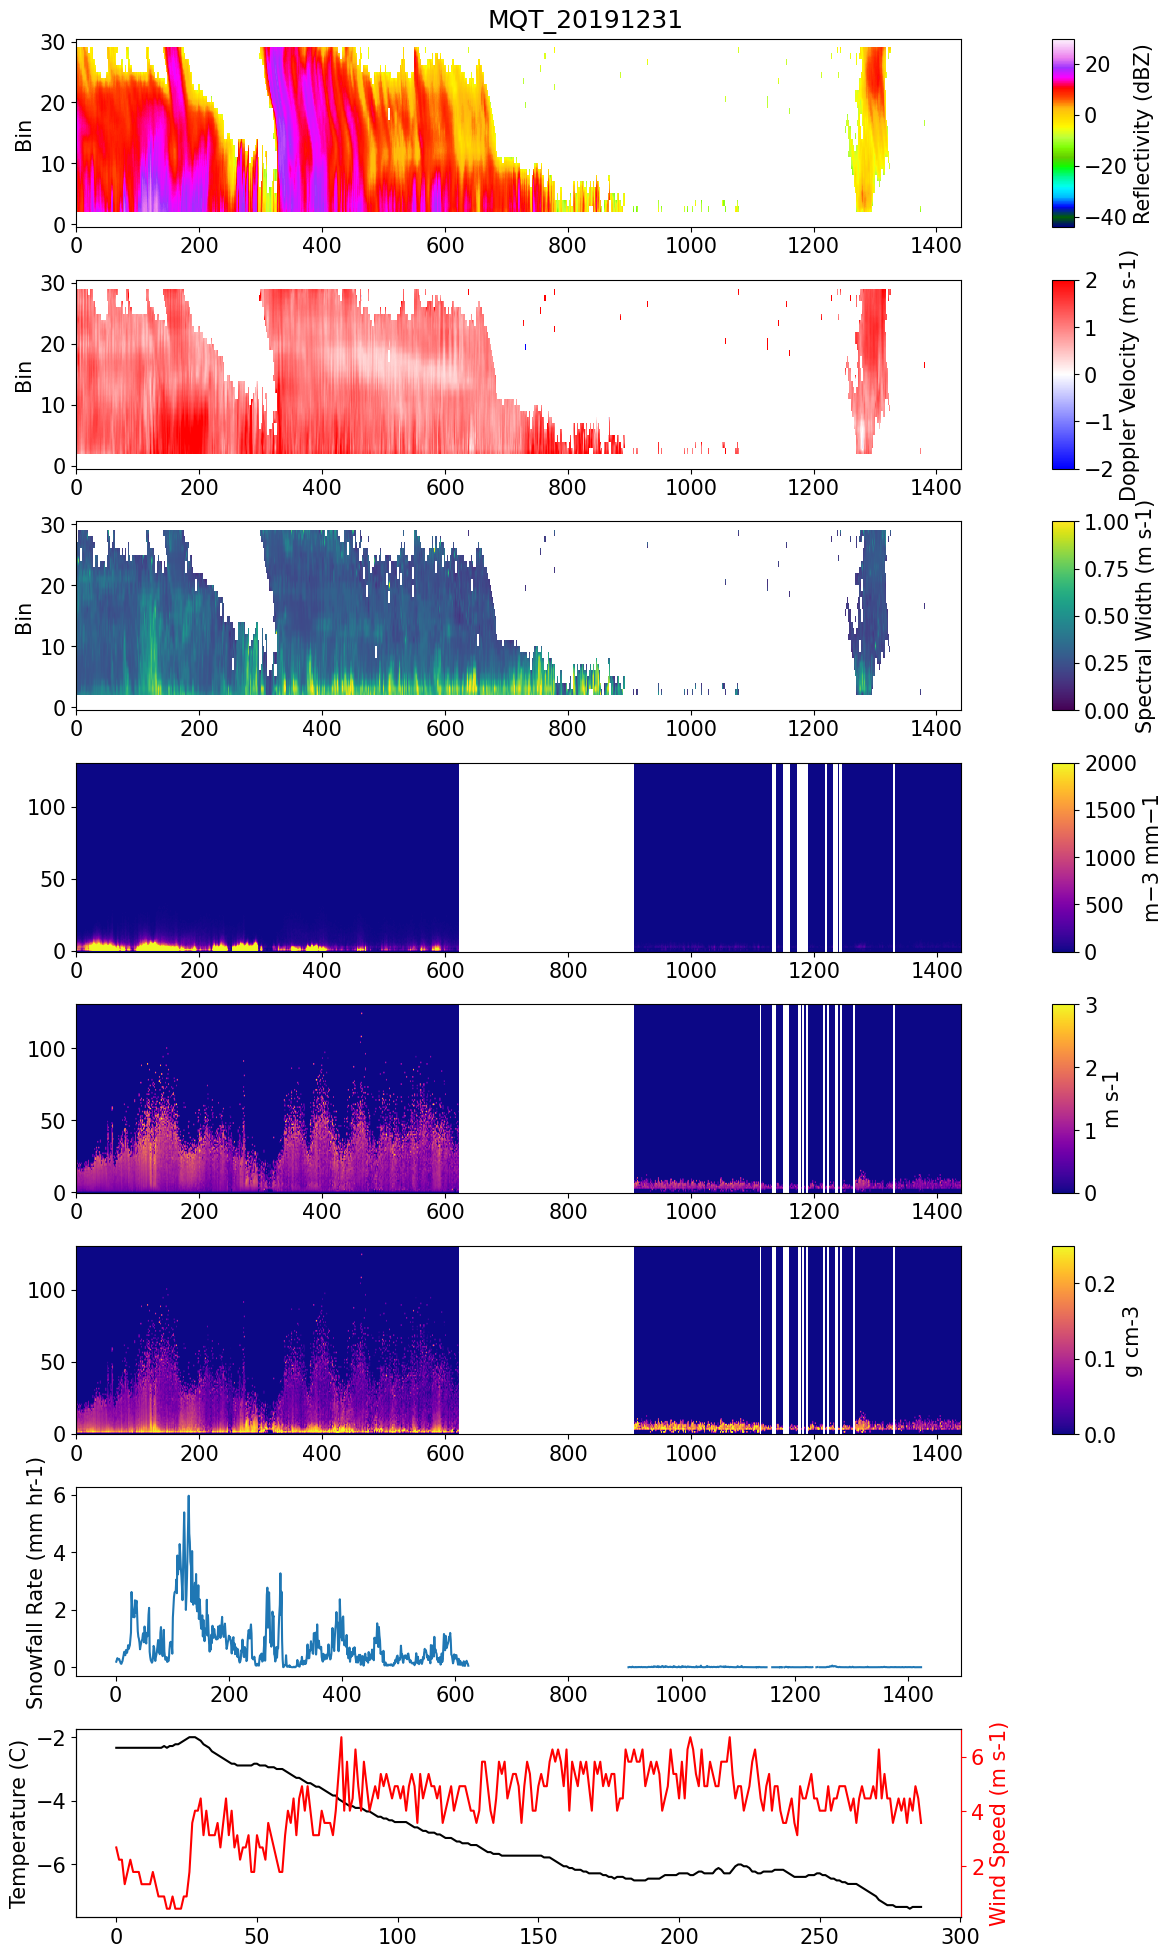

In [283]:
################# MRR DATA

def plot_data_for_day(day):
    ds_mrr = xr.open_dataset(mrr_path + 'MRR_NWS_MQT_20191231_snow.nc')
    
    ze = ds_mrr['Ze'].values
    dv = ds_mrr['W'].values
    sw = ds_mrr['spectralWidth'].values
    
    fig = plt.figure(figsize=(12,20))
    fig.suptitle("MQT_20191231")
    gs = gridspec.GridSpec(8, 2, width_ratios=[1, 0.025])  # 7 rows, 2 columns, second column for colorbar is narrower

    ax = plt.subplot(gs[0, 0])
    h = ax.imshow(ze.T, cmap='gist_ncar', vmin=-44, vmax=30, aspect='auto')
    cbar_ax = plt.subplot(gs[0, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Reflectivity (dBZ)")
    ax.set_ylabel("Bin")
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[1, 0])
    h = ax.imshow(dv.T, cmap='bwr', vmin=-2, vmax=2, aspect='auto')
    cbar_ax = plt.subplot(gs[1, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Doppler Velocity (m s-1)")
    ax.set_ylabel("Bin")
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[2, 0])
    h = ax.imshow(sw.T, cmap='viridis', vmin=0, vmax=1, aspect='auto')
    cbar_ax = plt.subplot(gs[2, 1])
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label("Spectral Width (m s-1)")
    ax.set_ylabel("Bin")
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[3, 0])
    ds_pip = xr.open_dataset(pip_path + '/particle_size_distributions/006201912312350_01_dsd.nc')   
    cbar_ax = plt.subplot(gs[3, 1])
    val = ds_pip['psd'].values
    h = ax.imshow(val.T, cmap='plasma', vmin=0, vmax=2000, aspect='auto')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('m−3 mm−1')
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[4, 0])
    ds_pip = xr.open_dataset(pip_path + '/velocity_distributions/006201912312350_01_vvd_A.nc')
    cbar_ax = plt.subplot(gs[4, 1])   
    val = ds_pip['vvd'].values
    h = ax.imshow(val.T, cmap='plasma', vmin=0, vmax=3, aspect='auto')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('m s-1')
    ax.invert_yaxis()
    
    ax = plt.subplot(gs[5, 0])
    ds_pip = xr.open_dataset(pip_path + '/edensity_distributions/006201912312350_01_rho_Plots_D_minute.nc')   
    cbar_ax = plt.subplot(gs[5, 1])
    val = ds_pip['rho'].values
    h = ax.imshow(val.T, cmap='plasma', vmin=0, vmax=0.25, aspect='auto')
    cbar = fig.colorbar(h, cax=cbar_ax)
    cbar.set_label('g cm-3')
    ax.invert_yaxis()
    
    
    ax = plt.subplot(gs[6, 0])
    ds_lwe = xr.open_dataset(pip_path + '/edensity_lwe_rate/006201912312350_01_P_Minute.nc')    
    val = ds_lwe['nrr'].values
    ax.plot(np.arange(len(val)), val)
    ax.set_ylabel('Snowfall Rate (mm hr-1)')
    
    
    ax = plt.subplot(gs[7, 0])
    ds_met = xr.open_dataset(met_path + '2013-2020_MQT.nc')
    times = np.asarray((ds_met['UTC Time'].values / 1000000000), dtype=int)
    utc_time = pd.to_datetime(times, unit='s', origin='unix')
    ds_met = ds_met.assign_coords(time = utc_time)
    ds_met = ds_met.sel(time=(ds_met['time.year']==2019) & (ds_met['time.month']==12) & (ds_met['time.day']==31))
    
    t = ds_met['Temp Out'].values  
    p = ds_met['Wind Speed'].values     
    ax.plot(np.arange(len(t)), t, color='black')
    ax.set_ylabel('Temperature (C)')
    ax2 = ax.twinx()
    ax2.plot(np.arange(len(p)), p, color='red')
    ax2.set_ylabel('Wind Speed (m s-1)')
    ax2.spines['right'].set_color('red')
    ax2.yaxis.label.set_color('red')
    ax2.tick_params(axis='y', colors='red')
    
    plt.tight_layout()
    plt.show()
    
plot_data_for_day('')
